<a href="https://colab.research.google.com/github/Yassminhailala/Exploratory-Data-Analysis/blob/main/mod%C3%A8le1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving doliprane.jpeg to doliprane (1).jpeg


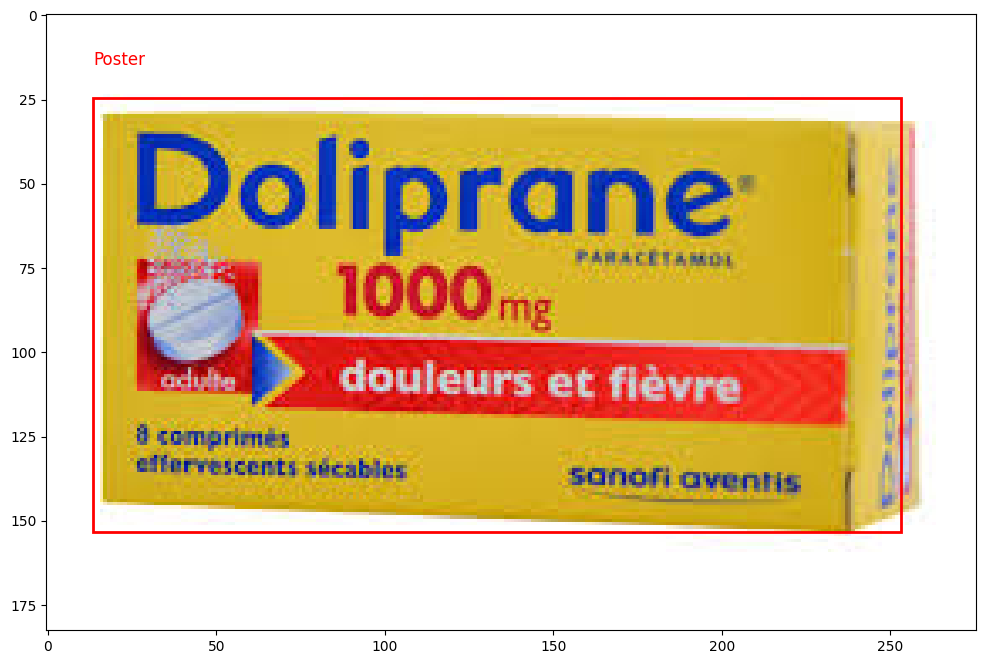

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from google.colab import files

# Téléchargement du fichier via Google Colab
uploaded = files.upload()

# Récupérer le chemin du fichier téléchargé
image_path = list(uploaded.keys())[0]

# Charger le modèle depuis TensorFlow Hub
model_url = 'https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1'
detector = hub.load(model_url).signatures['default']

# Fonction pour charger et préparer l'image
def load_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)[tf.newaxis, ...]
    return image

# Charger l'image
image_tensor = load_image(image_path)

# Exécuter la détection
result = detector(image_tensor)

# Convertir les résultats en numpy arrays
boxes = result['detection_boxes'].numpy()
scores = result['detection_scores'].numpy()
class_names = result['detection_class_entities'].numpy()

# Affichage des résultats
def display_boxes(image_path, boxes, scores, class_names):
    image = plt.imread(image_path)
    h, w, _ = image.shape

    fig, ax = plt.subplots(1, figsize=(12, 12))
    ax.imshow(image)

    for i in range(boxes.shape[0]):
        if scores[i] > 0.5:  # Seulement si le score est supérieur à 50%
            y_min, x_min, y_max, x_max = boxes[i]
            rect = patches.Rectangle(
                (x_min * w, y_min * h),
                (x_max - x_min) * w,
                (y_max - y_min) * h,
                linewidth=2, edgecolor='r', facecolor='none'
            )
            ax.add_patch(rect)
            ax.text(
                x_min * w, y_min * h - 10,
                class_names[i].decode("ascii"),
                color='red', fontsize=12, backgroundcolor="white"
            )

    plt.show()

# Affichage de l'image avec détection
display_boxes(image_path, boxes, scores, class_names)
